In [1]:
import os

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
PROJECT_DIR = r"E:\corals"
DATA_DIR = "data"

In [3]:
def get_data(name):
	file_name = f"{name}.csv"
	file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
	return pd.read_csv(file_path)

In [4]:
corals = get_data("coral")
coral = get_data("coral")
coral.head()


# df = pd.read_csv("path")

C:\Users\tusha\AppData\Local\Temp\ipykernel_15728\3836600136.py:4: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)
C:\Users\tusha\AppData\Local\Temp\ipykernel_15728\3836600136.py:4: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd


In [5]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name             41361 non-null  object 
 11  Ci

In [6]:
coral.duplicated().sum()

0

In [7]:
# df = df[df['SSTA' > 0]]
coral.shape

(41361, 62)

In [8]:
# f['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
coral['SSTA'] = pd.to_numeric(coral['SSTA'], errors = 'coerce')

In [9]:
coral = coral[coral['SSTA']>0]

In [10]:
coral.shape

(25833, 62)

In [11]:
coral.replace('nd',np.nan, inplace = True)

In [12]:
coral.isnull().sum()

Site_ID                   0
Sample_ID                 0
Data_Source               0
Latitude_Degrees          0
Longitude_Degrees         0
                      ...  
TSA_DHWMean               0
Date                      0
Site_Comments         24197
Sample_Comments       23672
Bleaching_Comments    23822
Length: 62, dtype: int64

In [13]:
column_having_null = coral.columns[coral.isnull().any()]

In [14]:
column_having_null

Index(['Reef_ID', 'Ecoregion_Name', 'Country_Name',
       'State_Island_Province_Name', 'City_Town_Name', 'Site_Name', 'Depth_m',
       'Substrate_Name', 'Percent_Cover', 'Bleaching_Level',
       'Percent_Bleaching', 'SSTA_Minimum', 'Site_Comments', 'Sample_Comments',
       'Bleaching_Comments'],
      dtype='object')

In [15]:
coral.drop(columns=['Site_ID','Sample_ID',"Data_Source","Ocean_Name","Reef_ID","Realm_Name","Ecoregion_Name","Country_Name","State_Island_Province_Name","City_Town_Name","Site_Name","Distance_to_Shore","Exposure","Turbidity","Cyclone_Frequency","Date_Day","Date_Month","Substrate_Name","Percent_Cover","Bleaching_Level","Date","Site_Comments","Sample_Comments","Bleaching_Comments"],inplace = True)

In [16]:
coral[coral.select_dtypes(include=['object']).columns] = coral.select_dtypes(include=['object']).apply(pd.to_numeric, errors='ignore')

C:\Users\tusha\AppData\Local\Temp\ipykernel_15728\1757181739.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  coral[coral.select_dtypes(include=['object']).columns] = coral.select_dtypes(include=['object']).apply(pd.to_numeric, errors='ignore')


In [17]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25833 entries, 1 to 41358
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude_Degrees                       25833 non-null  float64
 1   Longitude_Degrees                      25833 non-null  float64
 2   Date_Year                              25833 non-null  int64  
 3   Depth_m                                24438 non-null  float64
 4   Percent_Bleaching                      21998 non-null  float64
 5   ClimSST                                25833 non-null  float64
 6   Temperature_Kelvin                     25833 non-null  float64
 7   Temperature_Mean                       25833 non-null  float64
 8   Temperature_Minimum                    25833 non-null  float64
 9   Temperature_Maximum                    25833 non-null  float64
 10  Temperature_Kelvin_Standard_Deviation  25833 non-null  float64
 11  Windspe

In [18]:
coral = coral.fillna(coral.median())

In [19]:
coral.shape

(25833, 38)

In [20]:
coral.isnull().sum()

Latitude_Degrees                         0
Longitude_Degrees                        0
Date_Year                                0
Depth_m                                  0
Percent_Bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature_Kelvin_Standard_Deviation    0
Windspeed                                0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Mean                                0
SSTA_Minimum                             0
SSTA_Maximum                             0
SSTA_Frequency                           0
SSTA_Frequency_Standard_Deviation        0
SSTA_FrequencyMax                        0
SSTA_FrequencyMean                       0
SSTA_DHW                                 0
SSTA_DHW_Standard_Deviation              0
SSTA_DHWMax

In [21]:
coral_matrix = coral.corr()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

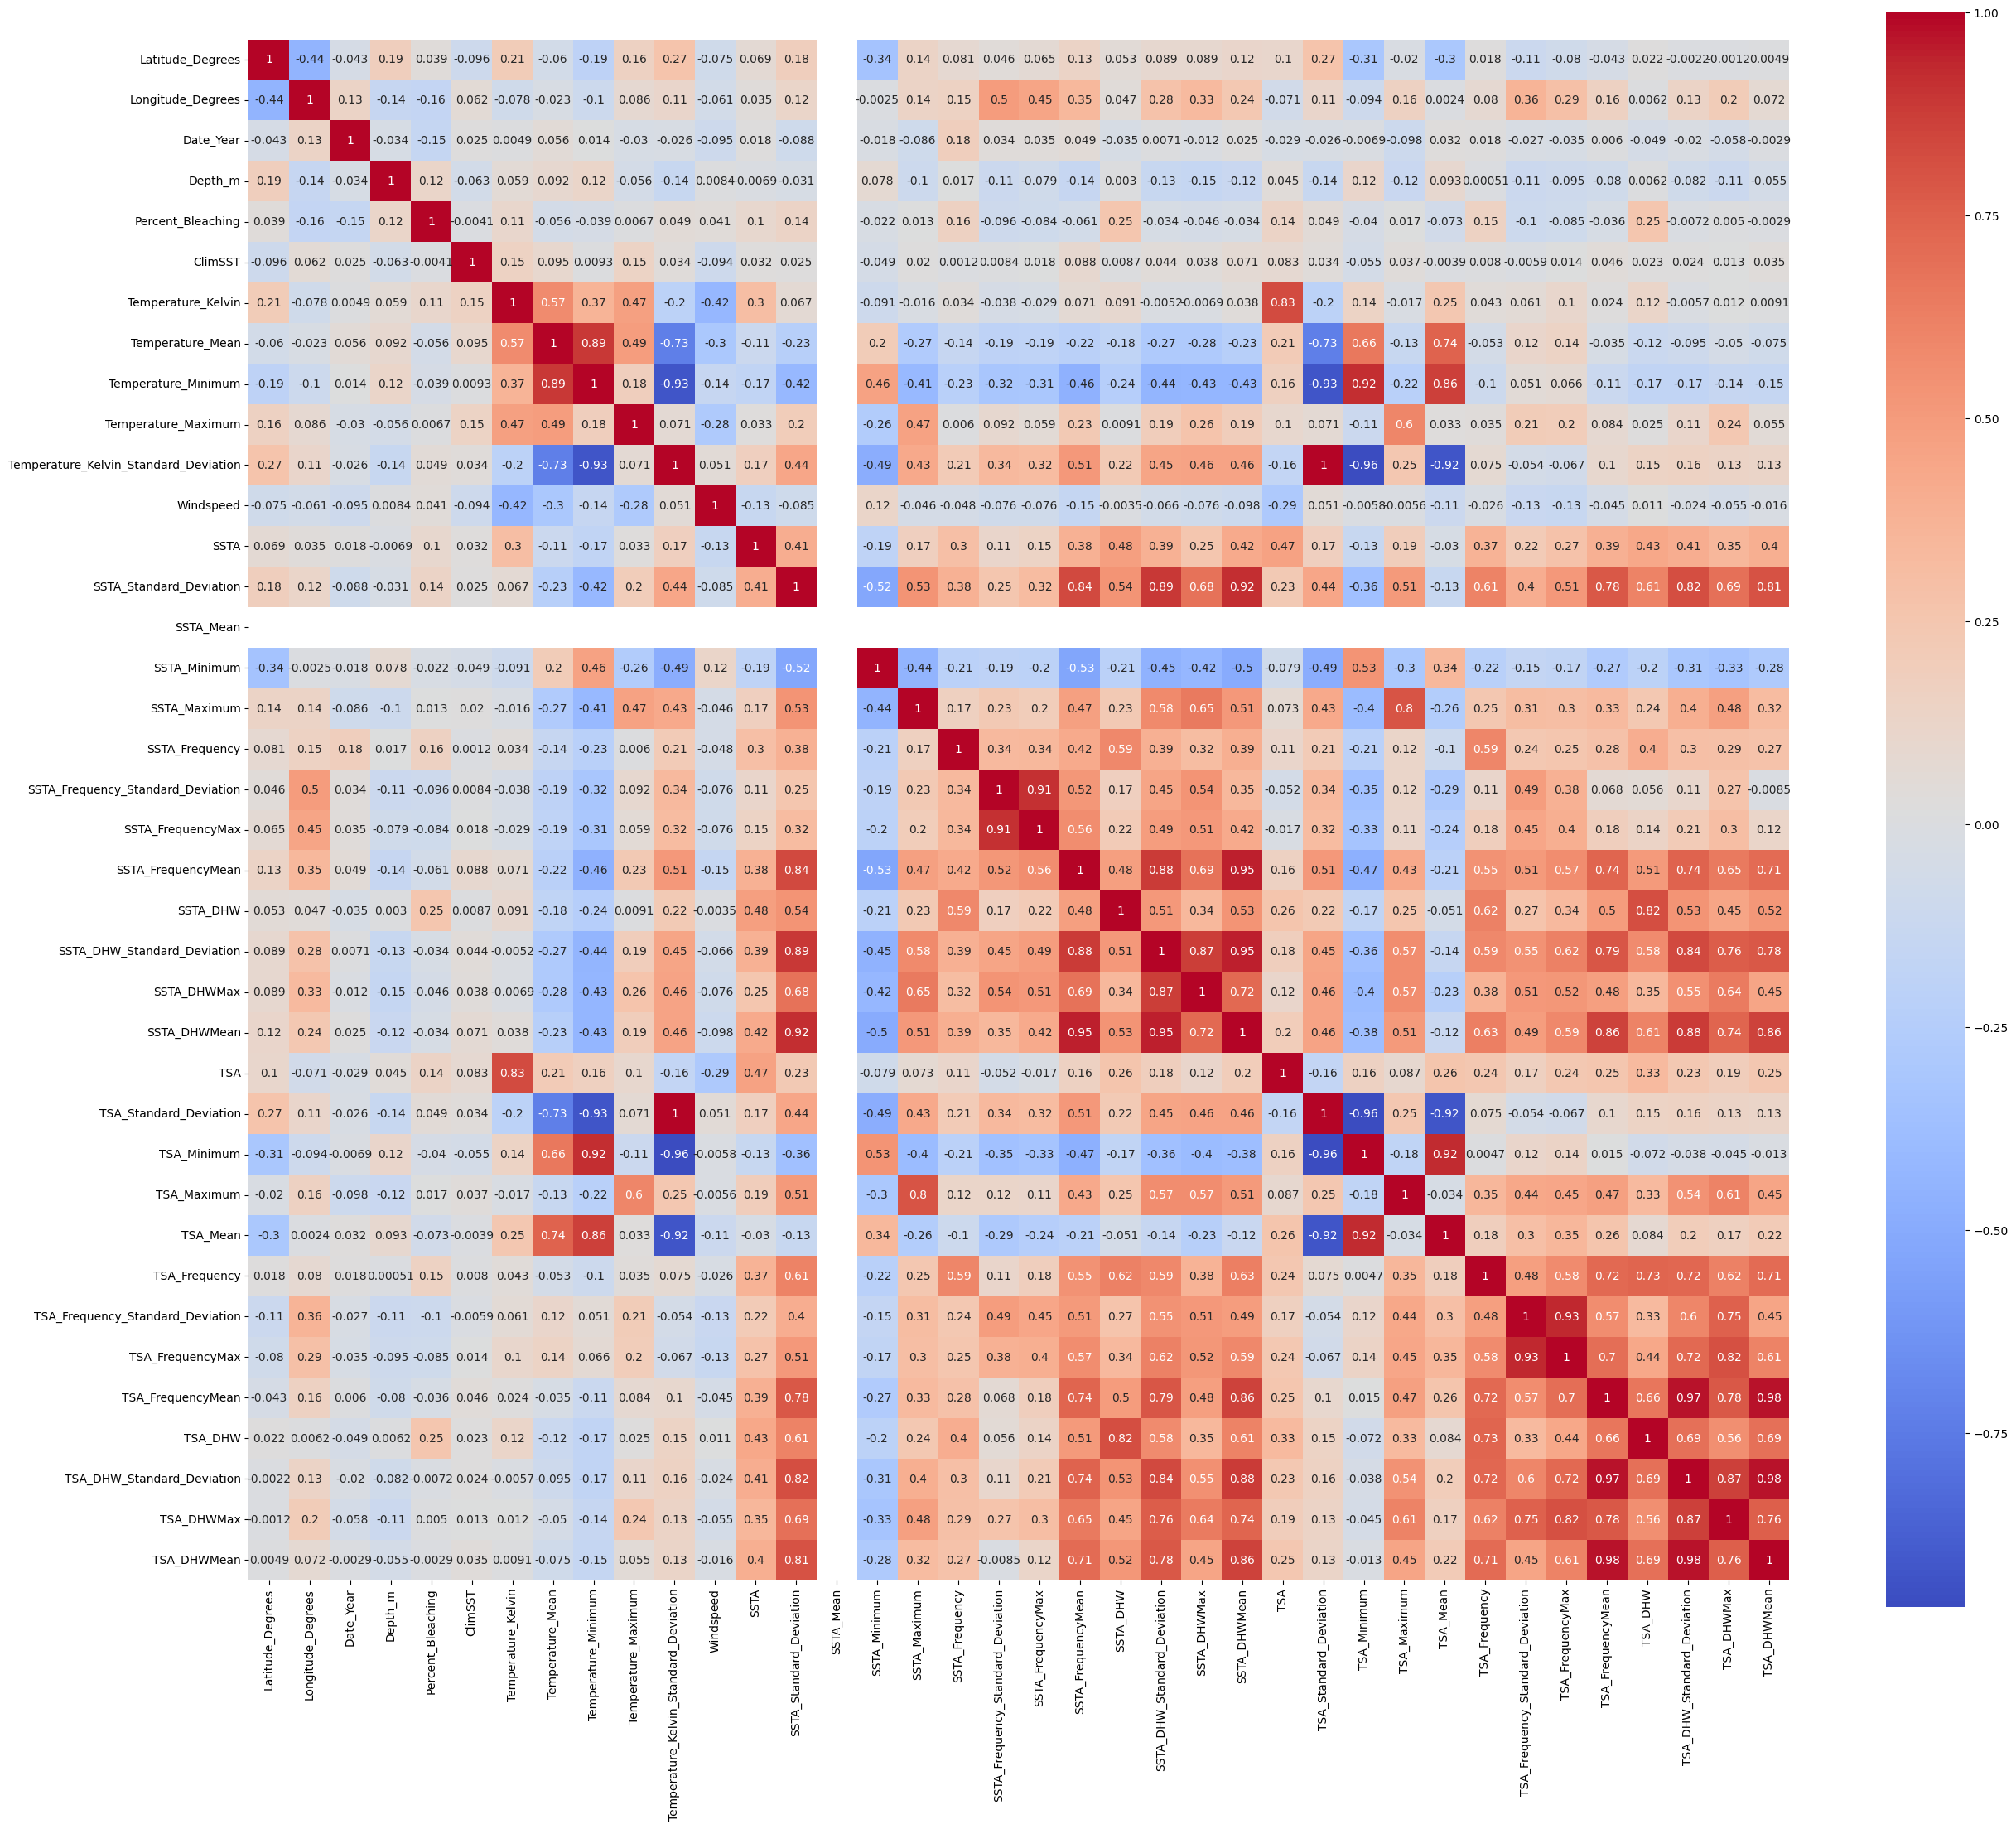

In [23]:
# mask = np.triu(np.ones_like(coral_matrix, dtype=bool)) mask=mask
plt.figure(figsize=(30, 25))
sns.heatmap(coral_matrix, annot= True, cmap='coolwarm',square=True)

From this, Heatmap it is determined that SSTA, ClimSST, Depth, Longitude, and Latitude were the
parameters of interest most closely correlated to bleaching,and they were not highly correlated to each other.

In [24]:
import eda_helper_functions

In [25]:
data = coral[["Longitude_Degrees","Latitude_Degrees",'SSTA',"ClimSST","Depth_m","Percent_Bleaching"]]

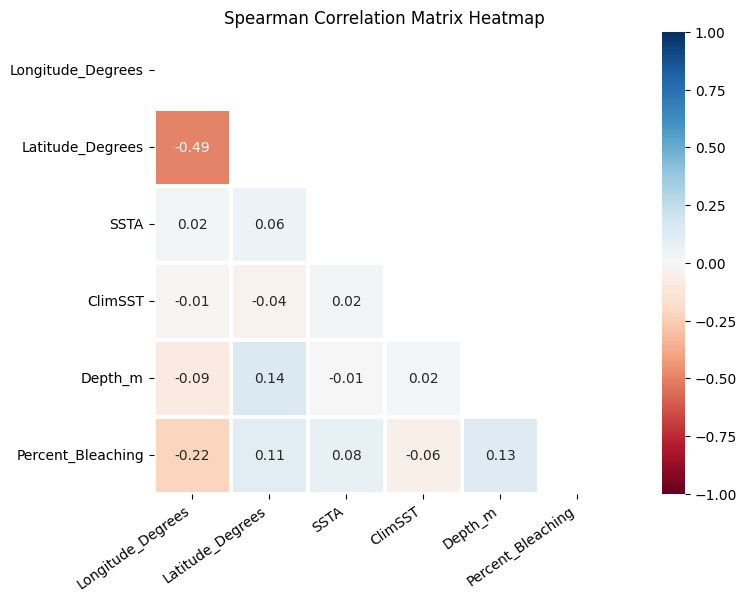

In [26]:
eda_helper_functions.correlation_heatmap(data)

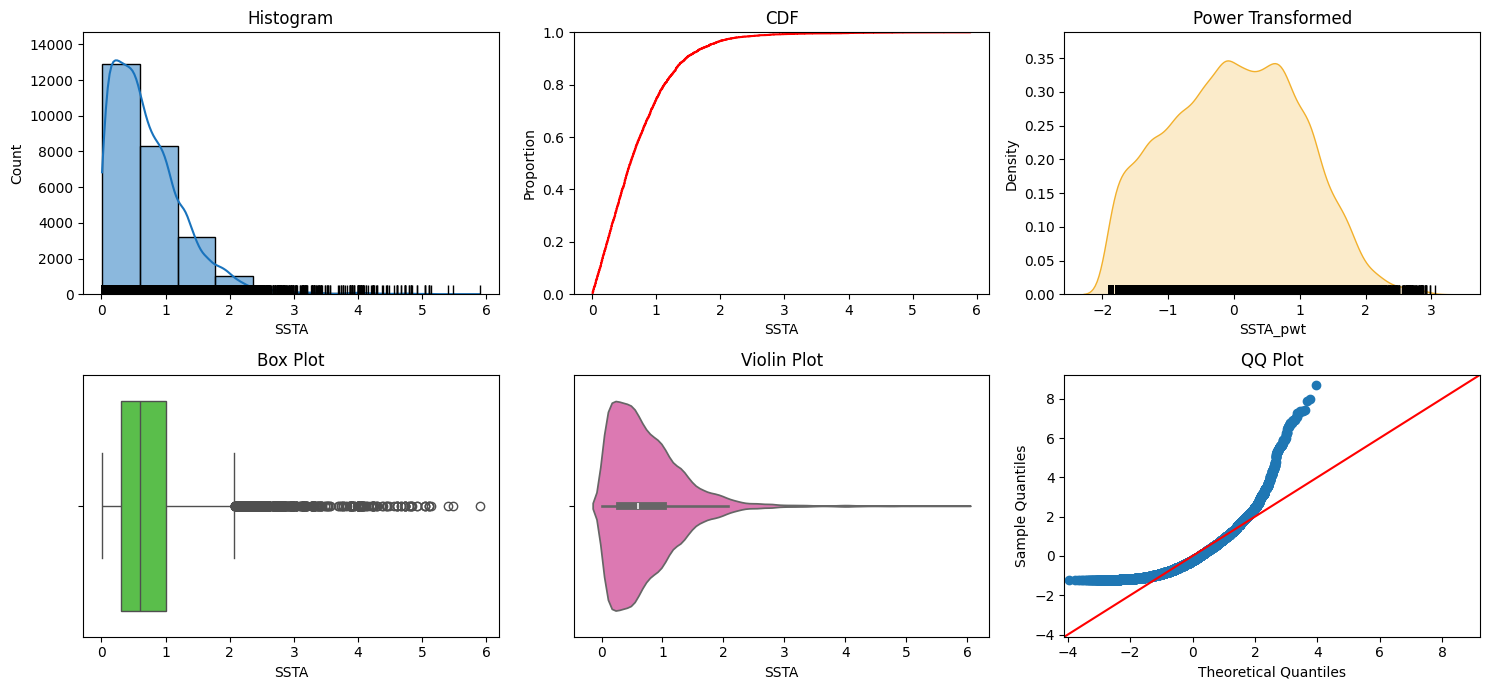

In [27]:
eda_helper_functions.num_univar_plots(data,'SSTA')

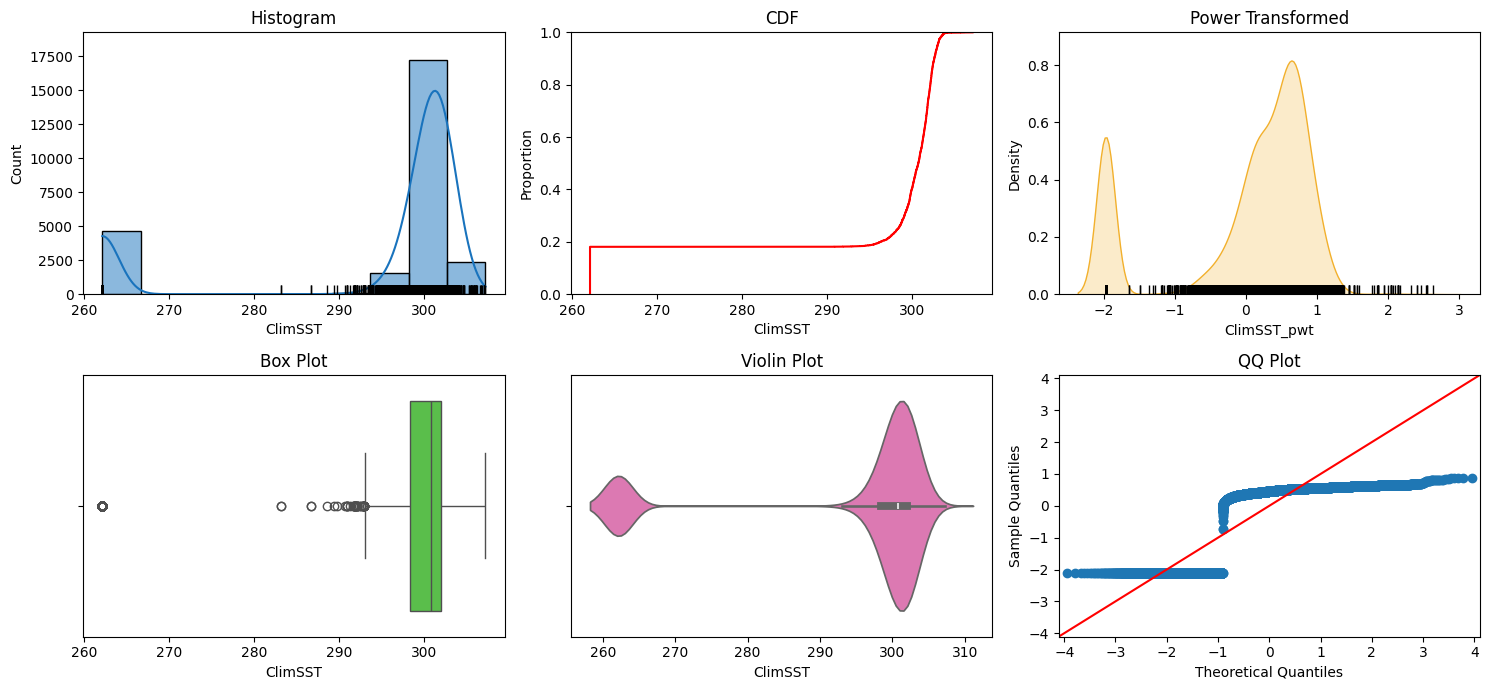

In [28]:
eda_helper_functions.num_univar_plots(data,'ClimSST')

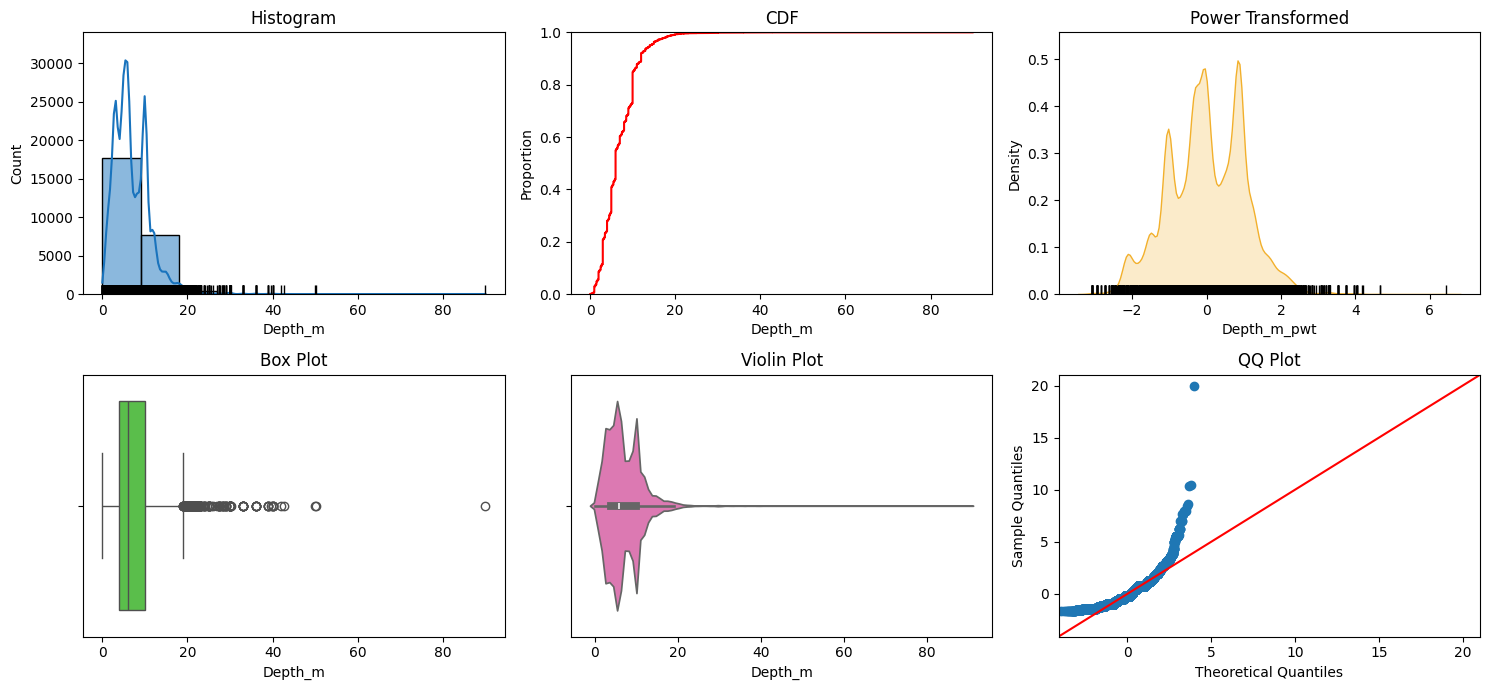

In [29]:
eda_helper_functions.num_univar_plots(data,'Depth_m')

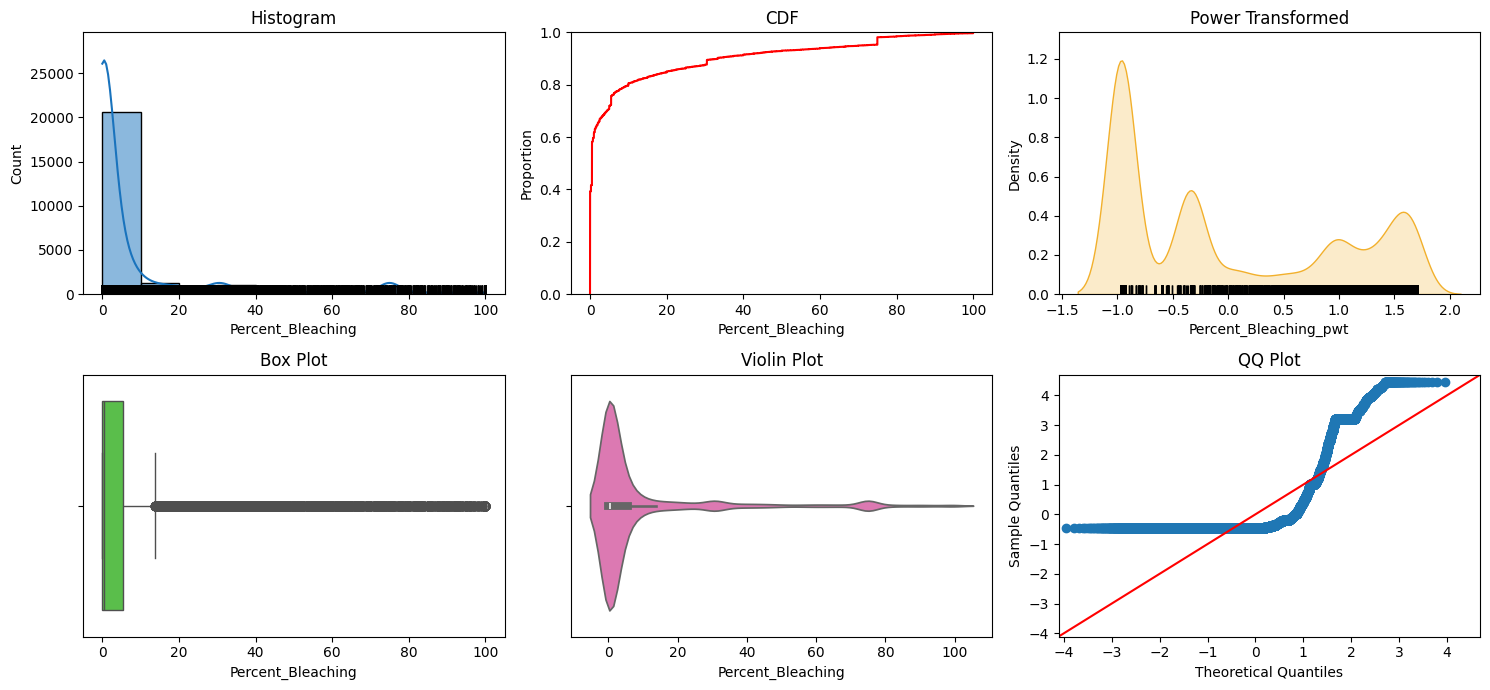

In [30]:
eda_helper_functions.num_univar_plots(data,'Percent_Bleaching')

In [31]:
eda_helper_functions.num_summary(data, "Percent_Bleaching")

1        50.70
2        50.90
5        51.00
6        51.30
7        51.38
         ...  
41351     0.50
41352     0.50
41353     0.50
41357     0.50
41358     0.50
Name: Percent_Bleaching, Length: 25833, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 25,833 / 25,833 rows


,value
percentile,
0,0.0000
5,0.0000
10,0.0000
25,0.0000
50,0.5000
75,5.5000
90,33.3000
95,71.0160
99,87.9648


,value
mean,9.513028
trimmed mean (5%),6.124682
trimmed mean (10%),3.828599
median,0.500000


,value
var,414.465997
std,20.358438
IQR,5.500000
mad,0.500000
coef_variance,2.140059


,value
skewness,2.604347
kurtosis,6.022661


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.3895608542573927e-121
Test Statistic       : 0.5307350782598923
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 5044.253523808475
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


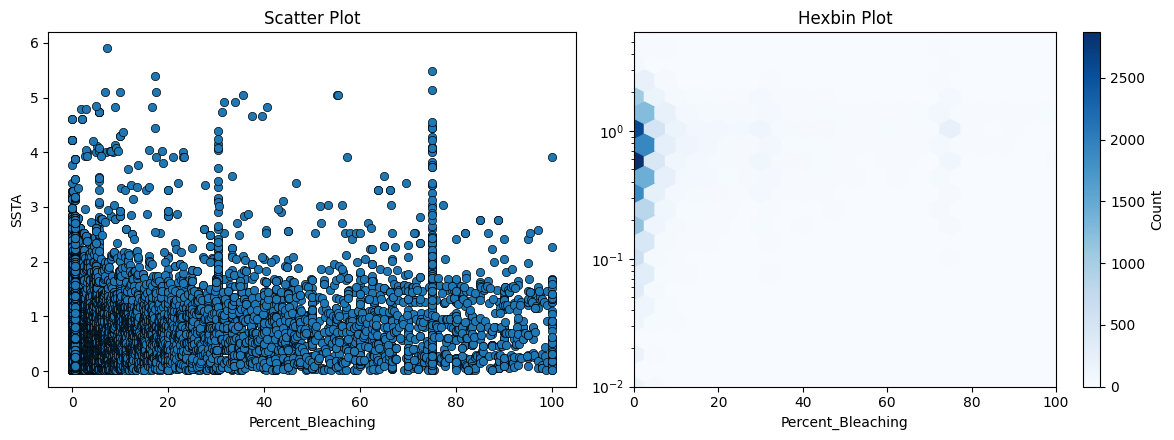

In [32]:
eda_helper_functions.num_bivar_plots(
	data,
	"Percent_Bleaching",
	"SSTA",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

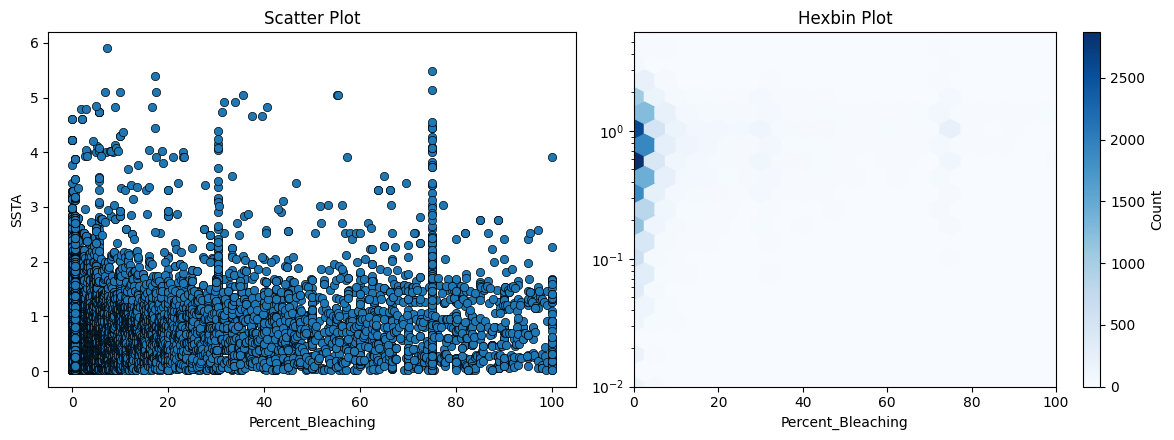

In [33]:
eda_helper_functions.num_bivar_plots(
	data,
	"Percent_Bleaching",
	"SSTA",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [34]:
x = coral[["Longitude_Degrees","Latitude_Degrees",'SSTA',"ClimSST","Depth_m"]]

In [35]:
x

,Longitude_Degrees,Latitude_Degrees,SSTA,ClimSST,Depth_m
1,-149.7833,-17.5750,1.29,262.15,14.0
2,-64.5640,18.3690,0.04,298.79,7.0
5,-75.8910,9.8220,0.27,302.63,11.5
6,-64.6300,17.8110,0.29,301.19,27.7
7,39.7500,-3.9900,0.91,299.88,6.0
...,...,...,...,...,...
41351,39.1223,-6.1562,0.80,299.79,3.0
41352,39.1266,-6.1511,0.80,299.79,3.0
41353,40.1500,-3.2600,1.06,300.44,1.5
41357,116.0503,-8.3473,0.10,301.01,3.5


In [36]:
y = coral["Percent_Bleaching"]

In [37]:
y

1        50.70
2        50.90
5        51.00
6        51.30
7        51.38
         ...  
41351     0.50
41352     0.50
41353     0.50
41357     0.50
41358     0.50
Name: Percent_Bleaching, Length: 25833, dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [40]:
X_train.shape

(20666, 5)

In [41]:
y_train.shape

(20666,)

In [42]:
X_test.shape

(5167, 5)

In [43]:
y_test.shape

(5167,)

In [44]:
X_test.shape

(5167, 5)

In [45]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

# Assuming X_train, X_test, y_train, y_test are already defined
# You can replace these with your actual data

# List of models to evaluate
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators = 300,max_depth = 16),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "GBMRegressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "LinearSVR": LinearSVR(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

# To store results
results = []

# Loop through each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    
    # Train the model
    model.fit(X_train , y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test )
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    elapsed_time = time.time() - start_time  # Time taken
    
    # Append results
    results.append([model_name, r2, rmse, elapsed_time])

# Create a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R-Squared", "RMSE", "Time Taken (s)"])

# Display the table
print(results_df)

# You can also save it to a CSV file if needed
results_df.to_csv("model_comparison_results.csv", index=False)


                           Model  R-Squared       RMSE  Time Taken (s)
0          RandomForestRegressor   0.612911  12.831984       15.884197
1            ExtraTreesRegressor   0.649050  12.218316        2.211654
2  HistGradientBoostingRegressor   0.456833  15.200402        0.318964
3                   GBMRegressor   0.329226  16.891824        1.764222
4                   XGBRegressor   0.543982  13.927701        0.121150
5                      LinearSVR  -0.163054  22.242754        0.074579
6     PassiveAggressiveRegressor  -0.156307  22.178141        0.026315
7          DecisionTreeRegressor   0.412847  15.803891        0.091872
8              AdaBoostRegressor  -0.016789  20.797161        0.232723


In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_pca = pca.fit_transform(X)

In [47]:
coral

,Latitude_Degrees,Longitude_Degrees,Date_Year,Depth_m,Percent_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,...,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
1,-17.5750,-149.7833,1991,14.0,50.70,262.15,303.30,300.73,297.58,305.01,...,3.00,-1.26,0.25,0.93,4.0,0.0,0.26,0.67,4.65,0.19
2,18.3690,-64.5640,2006,7.0,50.90,298.79,299.18,300.32,297.12,304.14,...,2.31,-1.49,7.00,1.31,7.0,0.0,0.00,1.04,11.66,0.26
5,9.8220,-75.8910,2005,11.5,51.00,302.63,303.22,302.02,298.22,305.48,...,2.42,-1.02,2.00,2.29,11.0,2.0,2.21,1.47,14.40,0.64
6,17.8110,-64.6300,2005,27.7,51.30,301.19,302.12,300.38,296.98,303.86,...,1.99,-1.48,6.00,1.24,6.0,0.0,6.89,0.77,6.89,0.22
7,-3.9900,39.7500,1998,6.0,51.38,299.88,301.88,299.97,295.39,304.30,...,2.58,-1.72,9.00,1.99,9.0,1.0,12.33,1.47,14.61,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41351,-6.1562,39.1223,2016,3.0,0.50,299.79,302.26,300.52,295.48,305.29,...,3.17,-1.58,6.00,2.06,9.0,2.0,7.84,1.67,10.00,0.72
41352,-6.1511,39.1266,2016,3.0,0.50,299.79,302.26,300.52,295.48,305.29,...,3.17,-1.58,6.00,2.06,9.0,2.0,7.84,1.67,10.00,0.72
41353,-3.2600,40.1500,2016,1.5,0.50,300.44,302.53,299.73,295.42,307.80,...,6.32,-1.73,4.00,2.14,11.0,1.0,3.42,2.22,21.90,0.76
41357,-8.3473,116.0503,2019,3.5,0.50,301.01,302.51,301.59,297.57,305.47,...,2.86,-1.00,1.00,1.75,8.0,1.0,2.00,1.29,8.01,0.65


In [48]:
coral_x = coral.drop(["Percent_Bleaching"],axis =1 )

In [49]:
coral_y = coral["Percent_Bleaching"]

In [50]:
X_scaled = scaler.fit_transform(coral_x)

In [51]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

In [52]:
x_pca

array([[ 1.21916306, -0.60910492,  1.92773586,  0.88948279,  2.77258858],
       [ 0.93630365, -0.69886366, -1.15711246, -0.35966053, -0.02752437],
       [ 1.02759651, -0.42677491, -1.09333663,  0.75429118,  0.5688442 ],
       ...,
       [-1.06659625,  0.69070422, -0.10388126, -0.94328455,  0.42556028],
       [-1.59379198, -0.78058572, -0.68483366, -0.2516593 , -0.06973536],
       [-1.59379198, -0.78058572, -0.68483366, -0.2516593 , -0.06973536]])

In [53]:
x_pca_train,x_pca_test,y_pca_train,y_pca_test = train_test_split(x_pca,coral_y,test_size = 0.20)

In [54]:

# Assuming X_train, X_test, y_train, y_test are already defined
# You can replace these with your actual data
# List of models to evaluate
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators = 300),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "GBMRegressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "LinearSVR": LinearSVR(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

# To store results
results = []

# Loop through each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    
    # Train the model
    model.fit(x_pca_train , y_pca_train)
    
    # Predict on the test set
    y_pred = model.predict(x_pca_test )
    
    # Calculate metrics
    r2 = r2_score(y_pca_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_pca_test, y_pred))
    elapsed_time = time.time() - start_time  # Time taken
    
    # Append results
    results.append([model_name, r2, rmse, elapsed_time])

# Create a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R-Squared", "RMSE", "Time Taken (s)"])

# Display the table
print(results_df)

# You can also save it to a CSV file if needed
results_df.to_csv("model_comparison_results.csv", index=False)


                           Model  R-Squared       RMSE  Time Taken (s)
0          RandomForestRegressor   0.492212  14.441735       31.894972
1            ExtraTreesRegressor   0.507940  14.216316        2.528597
2  HistGradientBoostingRegressor   0.302670  16.923777        0.240631
3                   GBMRegressor   0.195891  18.173369        3.241813
4                   XGBRegressor   0.368564  16.104339        0.103765
5                      LinearSVR  -0.161357  21.840422        0.074584
6     PassiveAggressiveRegressor  -0.052560  20.792251        0.027066
7          DecisionTreeRegressor   0.202836  18.094725        0.160536
8              AdaBoostRegressor  -0.199191  22.193322        0.449890


In [55]:
coral.head()

,Latitude_Degrees,Longitude_Degrees,Date_Year,Depth_m,Percent_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,...,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
1,-17.575,-149.7833,1991,14.0,50.70,262.15,303.30,300.73,297.58,305.01,...,3.00,-1.26,0.25,0.93,4.0,0.0,0.26,0.67,4.65,0.19
2,18.369,-64.5640,2006,7.0,50.90,298.79,299.18,300.32,297.12,304.14,...,2.31,-1.49,7.00,1.31,7.0,0.0,0.00,1.04,11.66,0.26
5,9.822,-75.8910,2005,11.5,51.00,302.63,303.22,302.02,298.22,305.48,...,2.42,-1.02,2.00,2.29,11.0,2.0,2.21,1.47,14.40,0.64
6,17.811,-64.6300,2005,27.7,51.30,301.19,302.12,300.38,296.98,303.86,...,1.99,-1.48,6.00,1.24,6.0,0.0,6.89,0.77,6.89,0.22
7,-3.990,39.7500,1998,6.0,51.38,299.88,301.88,299.97,295.39,304.30,...,2.58,-1.72,9.00,1.99,9.0,1.0,12.33,1.47,14.61,0.47


In [56]:
corals.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd


In [57]:
india = corals[corals['Ocean_Name'].str.contains('Indian', na= False)]

In [58]:
india.shape

(3054, 62)

In [103]:
coral_x_india = india.drop(["Percent_Bleaching"],axis =1 )

In [106]:
coral_y_india = india["Percent_Bleaching"]

In [107]:
pca = PCA(n_components=7)
X_pca_india = pca.fit_transform(coral_x_india)

In [110]:
x_pca_train,x_pca_test,y_pca_train,y_pca_test = train_test_split(X_pca_india,coral_y_india,test_size = 0.20)

In [59]:
india

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
7,5371,10325106,Donner,-3.9900,39.7500,Indian,nd,Western Indo-Pacific,Kenya and Tanzania coast,Kenya,...,9,1,12.33,1.47,14.61,0.47,1998-05-15,% bleached = Bleaching Index,% bleached = Bleaching Index,nd
56,5371,10325111,Donner,-3.9900,39.7500,Indian,nd,Western Indo-Pacific,Kenya and Tanzania coast,Kenya,...,9,1,9.75,1.47,14.61,0.47,1998-06-15,% bleached = Bleaching Index,% bleached = Bleaching Index,nd
68,6360,10325364,Donner,-19.6720,63.4170,Indian,nd,Western Indo-Pacific,Mascarene Islands,Mauritius,...,8.5,1,1.68,1.45,12.65,0.41,2005-03-15,nd,nd,nd
91,3813,10324859,Donner,12.0810,92.9600,Indian,nd,Western Indo-Pacific,Andaman Islands,India,...,8.83,1,6.34,1.82,17.16,0.56,2010-05-15,Most sites have 100% of fully bleached colonies,Most sites have 100% of fully bleached colonies,nd
116,5371,10325107,Donner,-3.9900,39.7500,Indian,nd,Western Indo-Pacific,Kenya and Tanzania coast,Kenya,...,9,1,12.33,1.47,14.61,0.47,1998-05-15,% bleached = Bleaching Index,% bleached = Bleaching Index,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41350,9882,10290624,McClanahan,-6.2772,39.1744,Indian,nd,Western Indo-Pacific,Kenya and Tanzania coast,Tanzania,...,8,2,6.96,1.53,10.82,0.67,2016-04-30,nd,Ussi,nd
41351,9883,10290629,McClanahan,-6.1562,39.1223,Indian,nd,Western Indo-Pacific,Kenya and Tanzania coast,Tanzania,...,9,2,7.84,1.67,10,0.72,2016-04-29,nd,Nyawira,nd
41352,9884,10290632,McClanahan,-6.1511,39.1266,Indian,nd,Western Indo-Pacific,Kenya and Tanzania coast,Tanzania,...,9,2,7.84,1.67,10,0.72,2016-04-29,nd,Nyawira,nd
41353,10189,10290452,McClanahan,-3.2600,40.1500,Indian,nd,Western Indo-Pacific,Kenya and Tanzania coast,Kenya,...,11,1,3.42,2.22,21.9,0.76,2016-04-12,nd,Nyawira,nd


In [112]:
india['SSTA'] = pd.to_numeric(india['SSTA'], errors = 'coerce')

In [113]:
india.shape

(1991, 38)

In [114]:
india = india[india['SSTA']>0]

In [115]:
india.shape

(1991, 38)

In [116]:
india.replace('nd',np.nan, inplace = True)

In [117]:
india_having_null = india.columns[india.isnull().any()]

In [118]:
india_having_null

Index([], dtype='object')

In [119]:
india.drop(columns=['Site_ID','Sample_ID',"Data_Source","Ocean_Name","Reef_ID","Realm_Name","Ecoregion_Name","Country_Name","State_Island_Province_Name","City_Town_Name","Site_Name","Distance_to_Shore","Exposure","Turbidity","Cyclone_Frequency","Date_Day","Date_Month","Substrate_Name","Percent_Cover","Bleaching_Level","Date","Site_Comments","Sample_Comments","Bleaching_Comments"],inplace = True)

KeyError: "['Site_ID', 'Sample_ID', 'Data_Source', 'Ocean_Name', 'Reef_ID', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level', 'Date', 'Site_Comments', 'Sample_Comments', 'Bleaching_Comments'] not found in axis"

In [ ]:
india[india.select_dtypes(include=['object']).columns] = india.select_dtypes(include=['object']).apply(pd.to_numeric, errors='ignore')

In [120]:
india.shape

(1991, 38)

In [121]:
india = india.fillna(india.median())

# india['Percent_Bleaching'].fillna(india['Percent_Bleaching'].medi(), inplace=True)
# india['Depth_m'].fillna(india['Depth_m'].mean(), inplace=True)

In [122]:
india.isnull().sum()

Latitude_Degrees                         0
Longitude_Degrees                        0
Date_Year                                0
Depth_m                                  0
Percent_Bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature_Kelvin_Standard_Deviation    0
Windspeed                                0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Mean                                0
SSTA_Minimum                             0
SSTA_Maximum                             0
SSTA_Frequency                           0
SSTA_Frequency_Standard_Deviation        0
SSTA_FrequencyMax                        0
SSTA_FrequencyMean                       0
SSTA_DHW                                 0
SSTA_DHW_Standard_Deviation              0
SSTA_DHWMax

In [123]:
india.shape

(1991, 38)

In [124]:
coral_x_india = india.drop(["Percent_Bleaching"],axis = 1)

In [125]:
coral_y_india = india["Percent_Bleaching"]

In [126]:
pca = PCA(n_components=5)
X_pca_india = pca.fit_transform(coral_x_india)

In [127]:
x_pca_train,x_pca_test,y_pca_train,y_pca_test = train_test_split(X_pca_india,coral_y_india,test_size = 0.20)

In [128]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor

# # Load the dataset
# data = coral  # Replace 'coral' with your actual DataFrame

# # Rename columns to match the provided feature names
# data = data.rename(columns={
#     'Latitude_Degrees': 'latitude',
#     'Longitude_Degrees': 'longitude',
#     'Depth_m': 'depth',
#     'ClimSST': 'ClimSST',
#     'SSTA': 'SSTA',
#     'Percent_Bleaching': 'bleaching_percentage',
#     'Date_Year': 'year'  # Assuming there is a column with year information named 'Year'
# })

# Remove rows with negative SSTA values
# data = data[data['SSTA'] >= 0]

# # Remove rows where the year is between 1998 and 2002 (inclusive)
# data = data[~data['year'].between(1998, 2002)]

# # Select relevant columns
# selected_columns = ['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA', 'bleaching_percentage']
# data = data[selected_columns].dropna()  # Drop rows with any remaining NaN values

# # Define features and target
# X = data[['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA']]
# y = data['bleaching_percentage']

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
#scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=mean_squared_error)

# Fit models and compare
models, predictions = regressor.fit(x_pca_train, x_pca_test, y_pca_train, y_pca_test)

# Display sorted results by RMSE
print(models.sort_values(by="RMSE"))

# Select the best model based on RMSE (lowest RMSE)
# best_model_name = models.sort_values(by="RMSE").index[0]
# best_model = predictions[best_model_name]  # Get the model instance

# Train the best model on the entire training data
# best_model.fit(X_train_scaled, y_train)




100%|█████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 13.42it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1592, number of used features: 5
[LightGBM] [Info] Start training from score 11.619209
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.67       0.67   15.33   
HistGradientBoostingRegressor                0.65       0.66   15.70   
XGBRegressor                                 0.64       0.64   15.99   
LGBMRegressor                                0.64       0.64   16.07   
RandomForestRegressor                        0.63       0.63   16.22   
BaggingRegressor                             0.61       0.61   16.65   
KNeighborsRegressor                          0.55       0.55   17.91   
GradientBoo

In [72]:
data_india = india[["Longitude_Degrees","Latitude_Degrees",'SSTA',"ClimSST","Depth_m","Percent_Bleaching"]]

In [111]:
data_india.head()

,Longitude_Degrees,Latitude_Degrees,SSTA,ClimSST,Depth_m,Percent_Bleaching
7,39.75,-3.99,0.91,299.88,5.50,51.38
56,39.75,-3.99,0.61,298.51,5.50,54.30
68,63.42,-19.67,1.66,262.15,3.50,55.00
91,92.96,12.08,1.81,262.15,5.50,56.45
116,39.75,-3.99,0.91,299.88,5.50,57.80


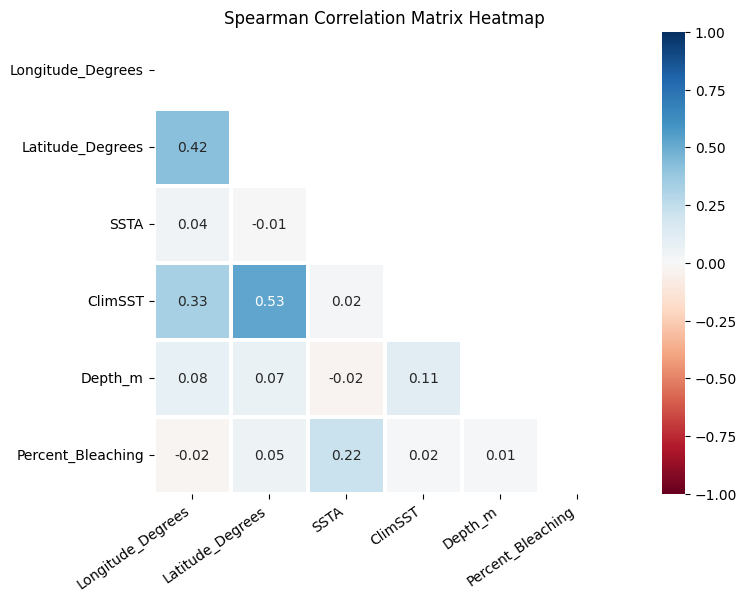

In [73]:
eda_helper_functions.correlation_heatmap(data_india)

In [74]:
x_india = india[["Longitude_Degrees","Latitude_Degrees",'SSTA',"ClimSST","Depth_m"]]

In [75]:
y_india = india["Percent_Bleaching"]

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_india = scaler.fit_transform(x_india)

In [77]:
from sklearn.model_selection import train_test_split
X_train_india,X_test_india,y_train_india,y_test_india = train_test_split(X_india,y_india,test_size = 0.2)

In [78]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

# Assuming X_train, X_test, y_train, y_test are already defined
# You can replace these with your actual data

# List of models to evaluate
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators = 100),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "GBMRegressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "LinearSVR": LinearSVR(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

# To store results
results = []

# Loop through each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    
    # Train the model
    model.fit(X_train_india , y_train_india)
    
    # Predict on the test set
    y_pred = model.predict(X_test_india )
    
    # Calculate metrics
    r2 = r2_score(y_test_india, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_india, y_pred))
    elapsed_time = time.time() - start_time  # Time taken
    
    # Append results
    results.append([model_name, r2, rmse, elapsed_time])

# Create a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R-Squared", "RMSE", "Time Taken (s)"])

# Display the table
print(results_df)

# You can also save it to a CSV file if needed
results_df.to_csv("model_comparison_results.csv", index=False)

                           Model  R-Squared       RMSE  Time Taken (s)
0          RandomForestRegressor   0.662097  13.678451        0.425312
1            ExtraTreesRegressor   0.718155  12.492416        0.187248
2  HistGradientBoostingRegressor   0.676039  13.393297        0.161018
3                   GBMRegressor   0.487880  16.839408        0.152674
4                   XGBRegressor   0.690162  13.098093        0.053392
5                      LinearSVR  -0.185699  25.622892        0.005000
6     PassiveAggressiveRegressor  -0.020569  23.771806        0.001997
7          DecisionTreeRegressor   0.494487  16.730438        0.008515
8              AdaBoostRegressor  -0.006864  23.611653        0.049725


In [79]:
model_reg =  ExtraTreesRegressor(n_estimators = 100)
model_reg.fit(X_train_india,y_train_india)

ExtraTreesRegressor()

In [80]:
y_pred = model_reg.predict(X_test_india)
r2 = r2_score(y_test_india, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_india, y_pred))

In [81]:
print(rmse,r2)

12.800740738532623 0.7040705193261416


In [82]:
import pickle
with open("regression_model.pkl",'wb') as file:
    pickle.dump(model,file)

In [83]:
data_india.head()

,Longitude_Degrees,Latitude_Degrees,SSTA,ClimSST,Depth_m,Percent_Bleaching
7,39.750,-3.990,0.91,299.88,5.5,51.38
56,39.750,-3.990,0.61,298.51,5.5,54.30
68,63.417,-19.672,1.66,262.15,3.5,55.00
91,92.960,12.081,1.81,262.15,5.5,56.45
116,39.750,-3.990,0.91,299.88,5.5,57.80


In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data  = coral
# Splitting data
X = data[["Longitude_Degrees"	,"Latitude_Degrees",	"SSTA",	"ClimSST"	,"Depth_m"]]
y = data['Percent_Bleaching']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random forest with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 16],
    'max_features': ['sqrt'],
    'criterion': ['friedman_mse',"poisson"]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best Model RMSE:", rmse)


Best Model RMSE: 12.794672170945889


In [85]:
best_rf.predict([[-60.5400,	14.2600,	0.03,	299.42,	10.00,]])

array([29.37846314])

In [86]:
# Install lazypredict
!pip install lazypredict

# Import necessary libraries
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data  = coral
# Splitting data
X = data[["Longitude_Degrees"	,"Latitude_Degrees",	"SSTA",	"ClimSST"	,"Depth_m"]]
y = data['Percent_Bleaching']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=mean_squared_error)

# Fit models and compare
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models.sort_values(by="RMSE"))



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


100%|█████████████████████████████████████████████████████████| 42/42 [03:47<00:00,  5.41s/it]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 20666, number of used features: 5
[LightGBM] [Info] Start training from score 9.529788
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.64       0.64   12.07   
RandomForestRegressor                        0.60       0.60   12.68   
BaggingRegressor                             0.56       0.56   13.32   
XGBRegressor                                 0.52       0.52   13.97   
LGBMRegressor                                0.45       0.45   14.89   
HistGradientBoostingRegressor                0.45       0.45   14.90   
DecisionTreeRegress

In [87]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = coral

# Rename columns to match the provided feature names
data = data.rename(columns={
    'Latitude_Degrees': 'latitude',
    'Longitude_Degrees': 'longitude',
    'Depth_m': 'depth',
    'ClimSST': 'ClimSST',
    'SSTA': 'SSTA',
    'Percent_Bleaching': 'bleaching_percentage',
    'Date_Year': 'year'  # Assuming there is a column with year information named 'Year'
})

# Remove rows with negative SSTA values
data = data[data['SSTA'] >= 0]

# Remove rows where the year is between 1998 and 2002 (inclusive)
data = data[~data['year'].between(1998, 2002)]

# Select relevant columns
selected_columns = ['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA', 'bleaching_percentage']
data = data[selected_columns].dropna()  # Drop rows with any remaining NaN values

# Define features and target
X = data[['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA']]
y = data['bleaching_percentage']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate RandomForestRegressor
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print("RandomForestRegressor - RMSE:", rf_rmse)
print("RandomForestRegressor - R^2:", rf_r2)

# Initialize and train ExtraTreesRegressor
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train_scaled, y_train)

# Predict and evaluate ExtraTreesRegressor
et_predictions = et_model.predict(X_test_scaled)
et_rmse = mean_squared_error(y_test, et_predictions, squared=False)
et_r2 = r2_score(y_test, et_predictions)

print("ExtraTreesRegressor - RMSE:", et_rmse)
print("ExtraTreesRegressor - R^2:", et_r2)


RandomForestRegressor - RMSE: 10.941141757692522
RandomForestRegressor - R^2: 0.6524484234604837
ExtraTreesRegressor - RMSE: 10.465189852926883
ExtraTreesRegressor - R^2: 0.6820284998399144


In [88]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = coral

# Rename columns to match the provided feature names
data = data.rename(columns={
    'Latitude_Degrees': 'latitude',
    'Longitude_Degrees': 'longitude',
    'Depth_m': 'depth',
    'ClimSST': 'ClimSST',
    'SSTA': 'SSTA',
    'Percent_Bleaching': 'bleaching_percentage',
    'Date_Year': 'year'  # Assuming there is a column with year information named 'Year'
})

# Remove rows with negative SSTA values
data = data[data['SSTA'] >= 0]

# Remove rows where the year is between 1998 and 2002 (inclusive)
data = data[~data['year'].between(1998, 2002)]

# Select relevant columns
selected_columns = ['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA', 'bleaching_percentage']
data = data[selected_columns].dropna()  # Drop rows with any remaining NaN values

# Define features and target
X = data[['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA']]
y = data['bleaching_percentage']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=mean_squared_error)

# Fit models and compare
models, predictions = regressor.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Display sorted results by RMSE
print(models.sort_values(by="RMSE"))

100%|█████████████████████████████████████████████████████████| 42/42 [02:00<00:00,  2.87s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 17330, number of used features: 5
[LightGBM] [Info] Start training from score 8.895409
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.68       0.68   10.47   
RandomForestRegressor                        0.65       0.65   10.94   
BaggingRegressor                             0.63       0.63   11.28   
XGBRegressor                                 0.55       0.55   12.48   
DecisionTreeRegressor                        0.49       0.49   13.19   
HistGradientBoostingRegressor                0.47       0.47   13.48   
LGBMRegressor                                0.46       0.46   13.60   
ExtraTreeRe

In [89]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor

# Load the dataset
data = coral  # Replace 'coral' with your actual DataFrame

# Rename columns to match the provided feature names
data = data.rename(columns={
    'Latitude_Degrees': 'latitude',
    'Longitude_Degrees': 'longitude',
    'Depth_m': 'depth',
    'ClimSST': 'ClimSST',
    'SSTA': 'SSTA',
    'Percent_Bleaching': 'bleaching_percentage',
    'Date_Year': 'year'  # Assuming there is a column with year information named 'Year'
})

# Remove rows with negative SSTA values
data = data[data['SSTA'] >= 0]

# Remove rows where the year is between 1998 and 2002 (inclusive)
data = data[~data['year'].between(1998, 2002)]

# Select relevant columns
selected_columns = ['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA', 'bleaching_percentage']
data = data[selected_columns].dropna()  # Drop rows with any remaining NaN values

# Define features and target
X = data[['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA']]
y = data['bleaching_percentage']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
#scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=mean_squared_error)

# Fit models and compare
models, predictions = regressor.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Display sorted results by RMSE
print(models.sort_values(by="RMSE"))

# Select the best model based on RMSE (lowest RMSE)
# best_model_name = models.sort_values(by="RMSE").index[0]
# best_model = predictions[best_model_name]  # Get the model instance

# Train the best model on the entire training data
# best_model.fit(X_train_scaled, y_train)




100%|█████████████████████████████████████████████████████████| 42/42 [02:11<00:00,  3.12s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 17330, number of used features: 5
[LightGBM] [Info] Start training from score 8.895409
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.68       0.68   10.47   
RandomForestRegressor                        0.65       0.65   10.94   
BaggingRegressor                             0.63       0.63   11.28   
XGBRegressor                                 0.55       0.55   12.48   
DecisionTreeRegressor                        0.49       0.49   13.19   
HistGradientBoostingRegressor                0.47       0.47   13.48   
LGBMRegressor                                0.46       0.46   13.60   
ExtraTreeRe

In [90]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor

# Load the dataset
data = coral  # Replace 'coral' with your actual DataFrame

# Rename columns to match the provided feature names
data = data.rename(columns={
    'Latitude_Degrees': 'latitude',
    'Longitude_Degrees': 'longitude',
    'Depth_m': 'depth',
    'ClimSST': 'ClimSST',
    'SSTA': 'SSTA',
    'Percent_Bleaching': 'bleaching_percentage',
    'Date_Year': 'year'  # Assuming there is a column with year information named 'Year'
})

# Remove rows with negative SSTA values
data = data[data['SSTA'] >= 0]

# Remove rows where the year is between 1998 and 2002 (inclusive)
data = data[~data['year'].between(1998, 2002)]

# Select relevant columns
selected_columns = ['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA', 'bleaching_percentage']
data = data[selected_columns].dropna()  # Drop rows with any remaining NaN values

# Define features and target
X = data[['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA']]
y = data['bleaching_percentage']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train = X_train[:8000]
X_test = X_test[:8000]
y_train = y_train[:8000]
y_test = y_test[:8000]

# Scale the features
#scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=mean_squared_error)

# Fit models and compare
models, predictions = regressor.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Display sorted results by RMSE
print(models.sort_values(by="RMSE"))

# Select the best model based on RMSE (lowest RMSE)
# best_model_name = models.sort_values(by="RMSE").index[0]
# best_model = predictions[best_model_name]  # Get the model instance

# Train the best model on the entire training data
# best_model.fit(X_train_scaled, y_train)




100%|████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 132.28it/s]

Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken, mean_squared_error]
Index: []


In [91]:
data = coral  # Replace 'coral' with your actual DataFrame

# Rename columns to match the provided feature names
data = data.rename(columns={
    'Latitude_Degrees': 'latitude',
    'Longitude_Degrees': 'longitude',
    'Depth_m': 'depth',
    'ClimSST': 'ClimSST',
    'SSTA': 'SSTA',
    'Percent_Bleaching': 'bleaching_percentage',
    'Date_Year': 'year'  # Assuming there is a column with year information named 'Year'
})

# Remove rows with negative SSTA values
data = data[data['SSTA'] >= 0]

# Remove rows where the year is between 1998 and 2002 (inclusive)
data = data[~data['year'].between(1998, 2002)]

selected_columns = ['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA', 'bleaching_percentage']
data = data[selected_columns].dropna()  # Drop rows with any remaining NaN values

In [92]:
data = data[selected_columns]
data.shape

(21663, 6)

In [93]:
data_final_X = data[['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA']]
data_final_y = data[['bleaching_percentage']]

In [94]:
# Define features and target
data_final_X = data[['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA']]
data_final_y = data[['bleaching_percentage']]

# Define a function to calculate IQR bounds for outliers
def get_outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Initialize a boolean mask to mark outliers
outlier_mask = pd.Series([False] * len(data_final_X), index=data.index)

# List of features to check for outliers
selected_features = ['longitude', 'latitude', 'depth', 'ClimSST', 'SSTA']

# Update the mask for each feature based on the IQR bounds
for feature in selected_features:
    lower_bound, upper_bound = get_outlier_bounds(data_final_X, feature)
    outlier_mask |= (data_final_X[feature] < lower_bound) | (data_final_X[feature] > upper_bound)

# Filter out rows containing outliers in both data_final_X and data_final_y
data_cleaned_X = data_final_X[~outlier_mask]
data_cleaned_y = data_final_y[~outlier_mask]

# Display the number of rows removed and the cleaned data
print(f"Number of rows removed: {len(data_final_X) - len(data_cleaned_X)}")
print("Cleaned Data (Features):")
print(data_cleaned_X)
print("Cleaned Data (Target):")
print(data_cleaned_y)


Number of rows removed: 4799
Cleaned Data (Features):
       longitude  latitude  depth  ClimSST  SSTA
2         -64.56     18.37   7.00   298.79  0.04
5         -75.89      9.82  11.50   302.63  0.27
8         -80.16     25.43   4.05   300.56  0.35
11        -64.62     17.77   9.80   301.24  0.56
14        -64.78     18.35   3.00   301.81  0.31
...          ...       ...    ...      ...   ...
41351      39.12     -6.16   3.00   299.79  0.80
41352      39.13     -6.15   3.00   299.79  0.80
41353      40.15     -3.26   1.50   300.44  1.06
41357     116.05     -8.35   3.50   301.01  0.10
41358     116.05     -8.35   3.50   301.01  0.10

[16864 rows x 5 columns]
Cleaned Data (Target):
       bleaching_percentage
2                     50.90
5                     51.00
8                     51.40
11                    51.70
14                    51.80
...                     ...
41351                  0.50
41352                  0.50
41353                  0.50
41357                  0.50
4

In [95]:
X_Test = data_cleaned_X.head(20)

In [96]:
Y_Test = data_cleaned_y.head(20)

In [97]:
X_Test 

,longitude,latitude,depth,ClimSST,SSTA
2,-64.56,18.37,7.00,298.79,0.04
5,-75.89,9.82,11.50,302.63,0.27
8,-80.16,25.43,4.05,300.56,0.35
11,-64.62,17.77,9.80,301.24,0.56
14,-64.78,18.35,3.00,301.81,0.31
17,-176.60,0.80,6.00,300.68,1.12
18,-80.18,25.33,3.75,302.40,0.06
20,-64.59,17.78,8.80,301.22,0.01
22,-80.10,26.00,8.30,300.90,0.33
23,-87.46,20.05,11.45,301.86,0.03


In [98]:
Y_Test

,bleaching_percentage
2,50.90
5,51.00
8,51.40
11,51.70
14,51.80
17,52.00
18,52.00
20,52.10
22,52.20
23,52.40
